In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from sklearn.svm import SVC, LinearSVC

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import SGDClassifier

from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB


from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, cross_val_predict

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [61]:
project_url = 'https://raw.githubusercontent.com/gimseng/99-ML-Learning-Projects/'
data_path = 'master/001/data/'
train=pd.read_csv(project_url+data_path+'train.csv')
test=pd.read_csv(project_url+data_path+'test.csv')


In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Performing Data Cleaning and Analysis
<!-- #### 1. Understanding meaning of each column: -->
<!-- <br>Data Dictionary: -->
<br>**Variable        Description**</br>
1. Survived	- Survived (1) or died (0)
2. Pclass -	Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. Name	- Passenger’s name
4. Sex -	Passenger’s sex
5. Age	- Passenger’s age
6. SibSp -	Number of siblings/spouses aboard
7. Parch -	Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.)
8. Ticket -	Ticket number
9. Fare -	Fare
10. Cabin -	Cabin
11. Embarked -	Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [64]:
"""
Deleting the columns not required for determining the survival of a person
"""

del train['PassengerId']
del train['Ticket']
del train['Fare']
del train['Cabin']
del train['Name']


In [65]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [66]:
train.shape

(891, 7)

In [67]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [68]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [69]:
"""Since there are ONLY 2 rows whose Embarked data is not known, 
therefore we can neglect those 2 rows as they will not make much of a difference"""


"""
Similarly, deleting the columns not required for determining the survival of a person for the data stored in test.csv
"""

del test['Ticket']
del test['Fare']
del test['Cabin']
del test['Name']

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [70]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch
count,418.000000,418.000000,332.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344
std,120.810458,0.841838,14.181209,0.896760,0.981429
min,892.000000,1.000000,0.170000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000


In [71]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [72]:
def getNum(str):
    if str=='male':
        return '1'
    if str=='female':
        return '2'
train["Gender"]=train["Sex"].apply(getNum)
train.head()

test["Gender"]=test["Sex"].apply(getNum)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,892,3,male,34.5,0,0,Q,1
1,893,3,female,47.0,1,0,S,2
2,894,2,male,62.0,0,0,Q,1
3,895,3,male,27.0,0,0,S,1
4,896,3,female,22.0,1,1,S,2


In [73]:
del train['Sex']

In [74]:
del test['Sex']

In [75]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,2
2,1,3,26.0,0,0,S,2
3,1,1,35.0,1,0,S,2
4,0,3,35.0,0,0,S,1


In [76]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Embarked,Gender
0,892,3,34.5,0,0,Q,1
1,893,3,47.0,1,0,S,2
2,894,2,62.0,0,0,Q,1
3,895,3,27.0,0,0,S,1
4,896,3,22.0,1,1,S,2


In [77]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=True)

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [78]:
train[['Gender','Survived']].groupby(['Gender']).mean().sort_values(by='Survived',ascending=True)

,Survived
Gender,
1,0.188908
2,0.742038


In [79]:
train[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=True)

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


In [80]:
train[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=True)

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


## Analyzing Data by Visualization

Inorder to understand who would have had a better probability of survival, we should visualize the patients who survived based on age, passenger class and etc.


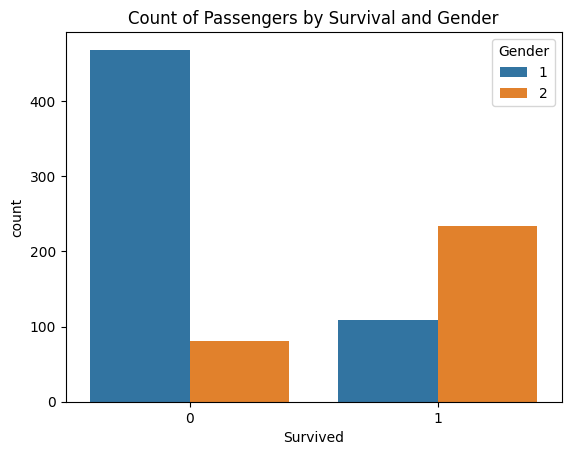

In [81]:
sns.countplot(x=train['Survived'], hue="Gender", data=train)
plt.title("Count of Passengers by Survival and Gender")
plt.show()

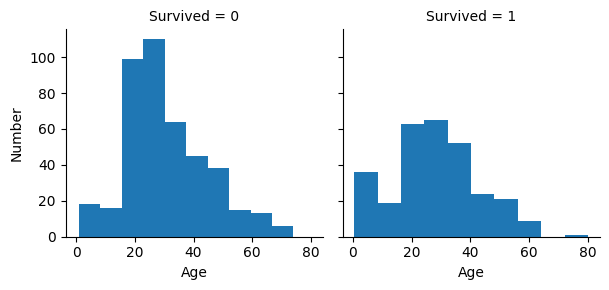

In [82]:
age_hist = sns.FacetGrid(train, col='Survived')
age_hist.map(plt.hist, 'Age')
age_hist.set_ylabels('Number')

Among those who didn't survive, most people were of the age 20-30 years whereas among those who survived, 
the number of infants are much higher than teenagers.

## Number of people who survived over age and passenger class


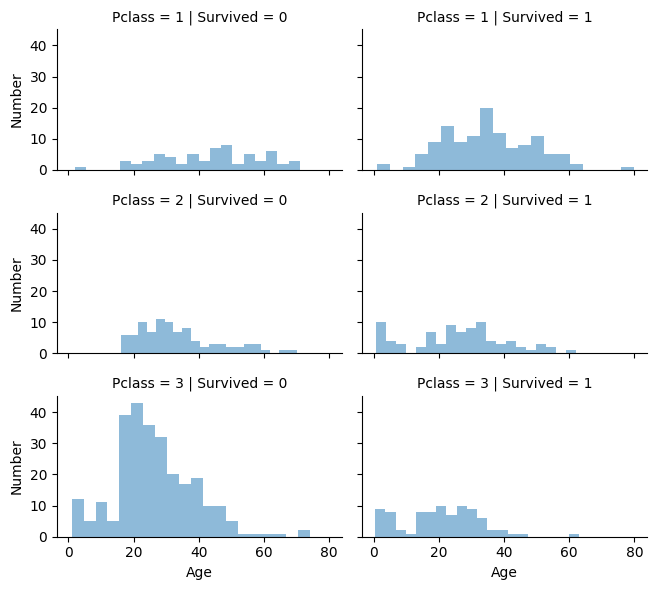

In [35]:
pclass_age_grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.0, aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
pclass_age_grid.add_legend()
pclass_age_grid.set_ylabels('Number')

## Handling the NULL values in the column Age

#### We have NULL value inplace of Age for some of the people in both training and testing data.
#### So, one way is to fill them with the mean values i.e. fill the ones who have survived with the mean age of the survived people and similarly fill those who haven't survived with the mean age of all non-survived people.

#### But, this will only solve the problem for the training data and not for the testing data as we have to predict their survival status.

#### So, we can tackle the issue by creating an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [36]:
#finding mean survived age
mean_sur= train[train.Survived==1]['Age'].mean()
mean_sur

np.float64(28.343689655172415)

In [37]:
# Finding the mean age of "Not Survived" people
mean_nsur=train[train['Survived']==0]['Age'].mean()
mean_nsur

np.float64(30.62617924528302)

In [38]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
    
    
train["Age"].isnull().sum()

np.int64(0)

In [39]:

#Renaming "gender" column
train.rename(columns={'Gender':'Sex'}, inplace=True)

test.rename(columns={'Gender':'Sex'}, inplace=True)

#Removing the 2 rows having null value for Embarked column
train.dropna(inplace=True)

train.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
0,0,3,22,1,0,S,1
1,1,1,38,1,0,C,2
2,1,3,26,0,0,S,2
3,1,1,35,1,0,S,2
4,0,3,35,0,0,S,1


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  889 non-null    int64 
 1   Pclass    889 non-null    int64 
 2   Age       889 non-null    int64 
 3   SibSp     889 non-null    int64 
 4   Parch     889 non-null    int64 
 5   Embarked  889 non-null    object
 6   Sex       889 non-null    object
dtypes: int64(5), object(2)
memory usage: 55.6+ KB


In [41]:
#Combining 'Parch' & 'SibSp' as 'Realtives'
train['Family_Members']=train['Parch']+train['SibSp'] + 1
test['Family_Members']=test['Parch']+test['SibSp'] + 1

del train['SibSp']
del train['Parch']

del test['SibSp']
del test['Parch']

In [42]:
train.head()

,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,22,S,1,2
1,1,1,38,C,2,2
2,1,3,26,S,2,1
3,1,1,35,S,2,2
4,0,3,35,S,1,1


In [43]:
test.head()

,PassengerId,Pclass,Age,Embarked,Sex,Family_Members
0,892,3,22,Q,1,1
1,893,3,38,S,2,2
2,894,2,26,Q,1,1
3,895,3,35,S,1,1
4,896,3,35,S,2,3


### Grouping the Age data

#### The age groups need to be converted into different sub-groups so that better prediction model can be formed

In [44]:
data=[train,test]

for dataset in data:
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 37), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 45), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 45 , 'Age'] = 6

train['Age'].value_counts()

Age
4    158
1    154
2    151
3    137
5    125
6    100
0     64
Name: count, dtype: int64

In [45]:
train.head()

,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,2,S,1,2
1,1,1,5,C,2,2
2,1,3,3,S,2,1
3,1,1,4,S,2,2
4,0,3,4,S,1,1


In [46]:
test.head()

,PassengerId,Pclass,Age,Embarked,Sex,Family_Members
0,892,3,2,Q,1,1
1,893,3,5,S,2,2
2,894,2,3,Q,1,1
3,895,3,4,S,1,1
4,896,3,4,S,2,3


In [47]:
data=[train,test]

for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map({'C': 0, 'S': 1, 'Q': 2}).astype(int)
    
train.head()

,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,2,1,1,2
1,1,1,5,0,2,2
2,1,3,3,1,2,1
3,1,1,4,1,2,2
4,0,3,4,1,1,1


In [48]:
train[['Age','Survived']].groupby(['Age']).mean().sort_values(by='Survived', ascending=True)

,Survived
Age,
3,0.335766
2,0.337748
5,0.368000
6,0.370000
1,0.370130
4,0.411392
0,0.593750


In [49]:
train[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=True)

,Survived
Embarked,
1,0.336957
2,0.389610
0,0.553571


In [50]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=True)

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.626168


<Axes: >

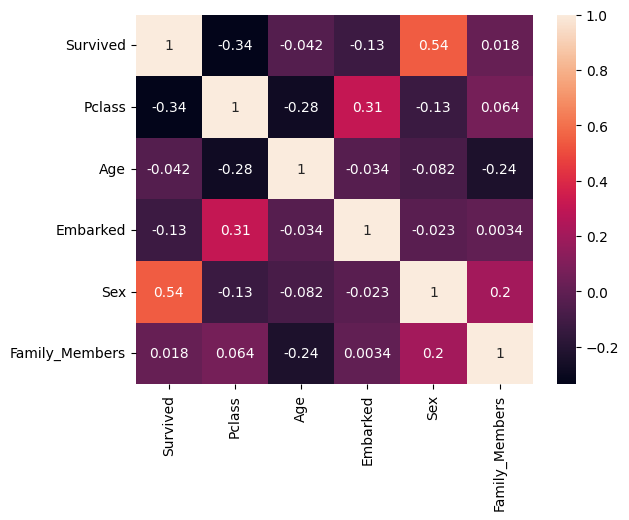

In [51]:
sns.heatmap(train.corr(), annot=True)

<Axes: >

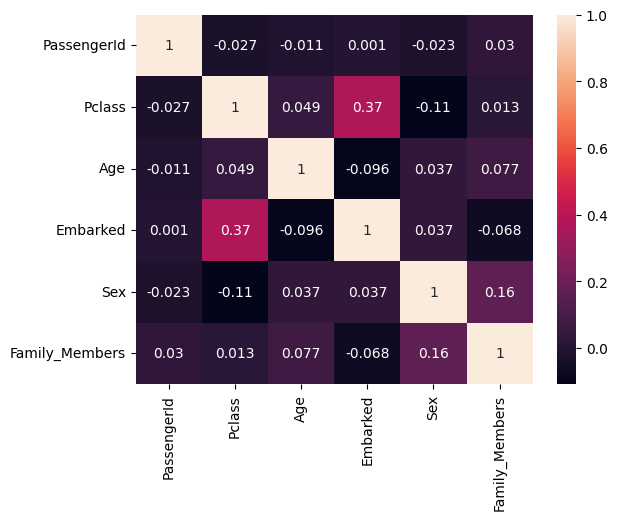

In [52]:
sns.heatmap(test.corr(), annot=True)

In [53]:
train


,Survived,Pclass,Age,Embarked,Sex,Family_Members
0,0,3,2,1,1,2
1,1,1,5,0,2,2
2,1,3,3,1,2,1
3,1,1,4,1,2,2
4,0,3,4,1,1,1
...,...,...,...,...,...,...
886,0,2,3,1,1,1
887,1,1,1,1,2,1
888,0,3,5,1,2,4
889,1,1,3,0,1,1


In [54]:
test

,PassengerId,Pclass,Age,Embarked,Sex,Family_Members
0,892,3,2,2,1,1
1,893,3,5,1,2,2
2,894,2,3,2,1,1
3,895,3,4,1,1,1
4,896,3,4,1,2,3
...,...,...,...,...,...,...
413,1305,3,4,1,1,1
414,1306,1,5,0,2,1
415,1307,3,1,1,1,1
416,1308,3,4,1,1,1


## Building Models for Prediction

#### Now we will train multiple Machine Learning algorithms over the training data to predict the survival on our testing data and analyze the results thus obtained.

#### We might also use use cross-validation in the end.

####  We know that since the survival is represented as either 0 or 1, therefore it is a Classification problem. The algorithms used for the same are:
##### Logistic Regression
##### Support Vector Machines
##### KNN or K-Nearest Neighbors
##### Decision Trees
##### Random Forest
##### Stochastic Gradient descent (SGD)
##### Gaussian Naive Bayes

In [44]:
X_train= train.drop(['Survived'], axis =1)
y_train= train['Survived']

X_test=test.drop('PassengerId', axis=1).copy()
X_test.shape

(418, 5)

## Logistic Regression

In [45]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(y_pred)


[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [46]:
round(np.mean(y_pred), 2)

0.37

In [47]:
# Checking accuracy of the linear regressor model

log_reg_acc = round(log_reg.score(X_train,y_train)*100, 2)
print(log_reg_acc,'%')

79.64 %


### We can find the correlation between the different features within the data inorder to analyze the survival of the people onboard.

In [48]:
df_coeff= pd.DataFrame(train.columns.delete(0))
df_coeff.columns = ['Feature']
df_coeff['Correlation'] = pd.Series(log_reg.coef_[0])

df_coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,Sex,2.644919
4,Family_Members,-0.181393
2,Embarked,-0.190135
1,Age,-0.200540
0,Pclass,-1.042129


#### From this we can conclude that Females (Sex=2) have a higher probability of surviving.

## Cross-Validation
#### Cross-Validation protects against overfitting.
#### It is a resampling method which tells us how well our model would generalize to unseen data. This is achieved by fixing a number of partitions of the dataset called folds, predicting each fold separately, and averaging the predictions in the end.



In [49]:
# Set our robust cross-validation scheme!
kf = KFold(n_splits = 10, random_state = 2)

# Print CV accuracy estimate:
#print(cross_val_score(logisticRegression, X_test, y_test, cv = kf).mean())
scores= cross_val_score(log_reg, X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_log = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_log, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

pred= cross_val_predict(log_reg, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, pred),'\n')

print("Precision: ", round(precision_score(y_train, pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, pred)*100, 2), '%')


Scores:  [74.15730337 80.8988764  75.28089888 78.65168539 77.52808989 76.40449438
 77.52808989 75.28089888 85.39325843 81.81818182] %
Mean:  78.29417773237999 %
Standard Deviation:  3.3127923441226788 %

Confusion Matrix: 
 [[468  81]
 [112 228]] 

Precision:  73.79 %
Recall:  67.06 %
F1 Score:  70.26 %


### The first row is about the not-survived-predictions: 470 passengers were correctly classified as not survived (called true negatives) and 79 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 110 passengers where wrongly classified as survived (false negatives) and 230 where correctly classified as survived (true positives).

## Support Vector Machine (SVM)

In [50]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print(y_pred)
y_pred.shape

[0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


(418,)

In [51]:
round(np.mean(y_pred), 2)

0.37

In [52]:
# Checking accuracy of the support vector model

svc_acc = round(svc.score(X_train,y_train)*100, 2)
print(svc_acc,'%')

83.01 %


In [53]:
# Print CV accuracy estimate:
#print(cross_val_score(SVC(), X_test, y_test, cv = kf).mean())

scores= cross_val_score(SVC(), X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_svc = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_svc, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

pred= cross_val_predict(svc, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, pred),'\n')

print("Precision: ", round(precision_score(y_train, pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, pred)*100, 2), '%')


Scores:  [79.7752809  86.51685393 78.65168539 84.26966292 82.02247191 82.02247191
 79.7752809  77.52808989 88.76404494 85.22727273] %
Mean:  82.45531154239019 %
Standard Deviation:  3.4750078757718716 %

Confusion Matrix: 
 [[491  58]
 [ 98 242]] 

Precision:  80.67 %
Recall:  71.18 %
F1 Score:  75.62 %


### The first row is about the not-survived-predictions: 493 passengers were correctly classified as not survived (called true negatives) and 56 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 100 passengers where wrongly classified as survived (false negatives) and 240 where correctly classified as survived (true positives).

## K-Nearest Neighbor (KNN)

In [54]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 1 1 0 0 1 0 0 0]


In [55]:
round(np.mean(y_pred), 2)

0.39

In [56]:
# Checking accuracy of the knn model

knn_acc = round(knn.score(X_train,y_train)*100, 2)
print(knn_acc,'%')

83.8 %


In [57]:
# Print CV accuracy estimate:
#print(cross_val_score(KNeighborsClassifier(), X_test, y_test, cv = kf).mean())

scores= cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_knn = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_knn, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

pred= cross_val_predict(knn, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, pred), '\n')

print("Precision: ", round(precision_score(y_train, pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, pred)*100, 2), '%')

Scores:  [75.28089888 79.7752809  78.65168539 82.02247191 86.51685393 75.28089888
 79.7752809  76.40449438 83.14606742 78.40909091] %
Mean:  79.52630234933606 %
Standard Deviation:  3.4078007011732017 %

Confusion Matrix: 
 [[481  68]
 [114 226]] 

Precision:  76.87 %
Recall:  66.47 %
F1 Score:  71.29 %


### The first row is about the not-survived-predictions: 484 passengers were correctly classified as not survived (called true negatives) and 65 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 107 passengers where wrongly classified as survived (false negatives) and 233 where correctly classified as survived (true positives).

## Decision Trees

In [58]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 0 0 0]


In [59]:
round(np.mean(y_pred), 2)

0.35

In [60]:
#Checking accuracy of Decision Tree model

tree_acc = round(tree.score(X_train, y_train)*100, 3)
print(tree_acc,'%')

86.727 %


In [61]:
# Print CV accuracy estimate:
#print(cross_val_score(DecisionTreeClassifier(), X_test, y_test, cv = kf).mean())

scores= cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_tree = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_tree, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')



Scores:  [73.03370787 82.02247191 79.7752809  76.40449438 80.8988764  76.40449438
 76.40449438 74.15730337 86.51685393 76.13636364] %
Mean:  78.17543411644536 %
Standard Deviation:  3.8794954123243657 %



## Random Forest

In [62]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
print(y_pred)


[0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 0 0 0]


In [63]:
round(np.mean(y_pred),2 )

0.38

In [64]:
# Checking accuracy of the Random Forest Classifier

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 3)
print(acc_random_forest,'%')

86.727 %


In [65]:
# Print CV accuracy estimate:
#print(cross_val_score(RandomForestClassifier(), X_test, y_test, cv = kf).mean())

scores= cross_val_score(RandomForestClassifier(), X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_ranfor = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_ranfor, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

pred= cross_val_predict(random_forest, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, pred), '\n')

print("Precision: ", round(precision_score(y_train, pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, pred)*100, 2), '%')

Scores:  [74.15730337 77.52808989 82.02247191 75.28089888 82.02247191 78.65168539
 78.65168539 74.15730337 87.64044944 80.68181818] %
Mean:  79.07941777323799 %
Standard Deviation:  3.985445770810656 %

Confusion Matrix: 
 [[477  72]
 [115 225]] 

Precision:  75.76 %
Recall:  66.18 %
F1 Score:  70.64 %


### The first row is about the not-survived-predictions: 479 passengers were correctly classified as not survived (called true negatives) and 70 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 115 passengers where wrongly classified as survived (false negatives) and 225 where correctly classified as survived (true positives).

## Stochastic Gradient Descent (SGD)

In [66]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [67]:
round(np.mean(y_pred), 2)

0.5

In [68]:
#Checking accuracy of the SGD model

sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_sgd,'%')

75.03 %


In [69]:
# Print CV accuracy estimate:
#print(cross_val_score(SGDClassifier(max_iter=5, tol=None), X_test, y_test, cv = kf).mean())

scores= cross_val_score(SGDClassifier(max_iter=5, tol=None), X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_sgd = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_sgd, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

pred= cross_val_predict(sgd, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, pred), '\n')

print("Precision: ", round(precision_score(y_train, pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, pred)*100, 2), '%')

Scores:  [67.41573034 77.52808989 66.29213483 74.15730337 74.15730337 69.66292135
 78.65168539 71.91011236 78.65168539 80.68181818] %
Mean:  73.9108784473953 %
Standard Deviation:  4.756912892690448 %

Confusion Matrix: 
 [[458  91]
 [167 173]] 

Precision:  65.53 %
Recall:  50.88 %
F1 Score:  57.28 %


### The first row is about the not-survived-predictions: 458 passengers were correctly classified as not survived (called true negatives) and 91 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 16 passengers where wrongly classified as survived (false negatives) and 224 where correctly classified as survived (true positives).

## Gaussian Naive Bayes

In [70]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)
print(y_pred)


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [71]:
round(np.mean(y_pred), 2)

0.42

In [72]:
#Checking accuracy for the Gaussian Naive Bayes model

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(acc_gaussian,'%')

79.98 %


In [73]:
# Print CV accuracy estimate:
#print(cross_val_score(GaussianNB() , X_test, y_test, cv = kf).mean())

scores= cross_val_score(GaussianNB() , X_train, y_train, cv = kf, scoring='accuracy')

mean_acc_gau = scores.mean()*100

print('Scores: ', scores*100, '%')
print('Mean: ', mean_acc_gau, '%')
print('Standard Deviation: ', scores.std()*100, '%\n')

#Confusion Matrix
pred= cross_val_predict(gaussian, X_train, y_train, cv=kf)
print('Confusion Matrix: \n' ,confusion_matrix(y_train, pred), '\n')

print("Precision: ", round(precision_score(y_train, pred)*100, 2),'%')
print("Recall: ", round(recall_score(y_train, pred)*100, 2), '%')
print('F1 Score: ', round(f1_score(y_train, pred)*100, 2), '%')

Scores:  [75.28089888 77.52808989 77.52808989 82.02247191 77.52808989 78.65168539
 79.7752809  80.8988764  83.14606742 81.81818182] %
Mean:  79.41777323799796 %
Standard Deviation:  2.3912633037949353 %

Confusion Matrix: 
 [[464  85]
 [ 98 242]] 

Precision:  74.01 %
Recall:  71.18 %
F1 Score:  72.56 %


### The first row is about the not-survived-predictions: 464 passengers were correctly classified as not survived (called true negatives) and 85 where wrongly classified as not survived (false positives).
### The second row is about the survived-predictions: 98 passengers where wrongly classified as survived (false negatives) and 242 where correctly classified as survived (true positives).

## Finding the Best Model

In [74]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN',  
              'Decision Tree','Random Forest',
              'Stochastic Gradient Decent', 
              'Gaussian Naive Bayes'],
    'Score': [log_reg_acc, svc_acc, knn_acc,  
              tree_acc, acc_random_forest, acc_sgd,
              acc_gaussian],
    'Mean Score': [mean_acc_log, mean_acc_svc, mean_acc_knn,
                   mean_acc_tree, mean_acc_ranfor, 
                   mean_acc_sgd, mean_acc_gau]})
df_result = results.sort_values(by='Mean Score', ascending=False)
df_result = df_result.set_index('Model')
df_result

,Score,Mean Score
Model,,
Support Vector Machines,83.010,82.455312
KNN,83.800,79.526302
Gaussian Naive Bayes,79.980,79.417773
Random Forest,86.727,79.079418
Logistic Regression,79.640,78.294178
Decision Tree,86.727,78.175434
Stochastic Gradient Decent,75.030,73.910878


###  As we can see, the Decision Tree Classifer & Random Forest Classifier coincidently outputs an equal amount of 86.73% accuracy on the test set and are both the most successful models for the set of features and the model that we have built.
### But, we also know that just calculating the accuracy without cross-validating could result in Overfitting that we can easily see in our models. So, after performing cross-validation, we find out the mean accuracy of each of the model which correctly identifies Support Vector Machines (SVC) as the best model with an accuracy of 82.45% for the given dataset.

                Importance
Features                  
Sex                  0.416
Age                  0.184
Pclass               0.177
Family_Members       0.160
Embarked             0.063


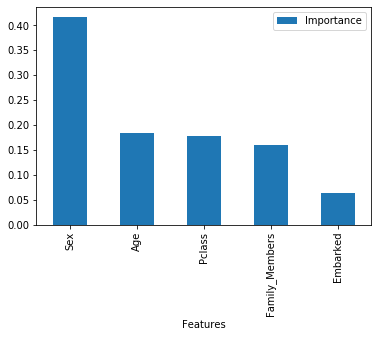

In [75]:
importances=pd.DataFrame({'Features': X_train.columns, 'Importance':np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
print(importances.head())
importances.plot.bar()

                Importance
Features                  
Sex                  0.485
Pclass               0.175
Family_Members       0.169
Age                  0.135
Embarked             0.036


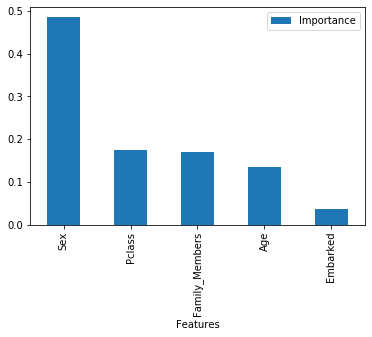

In [76]:
importances=pd.DataFrame({'Features': X_train.columns, 'Importance':np.round(tree.feature_importances_, 3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
print(importances.head())
importances.plot.bar()

In [77]:
test

,PassengerId,Pclass,Age,Embarked,Sex,Family_Members
0,892,3,2,2,1,1
1,893,3,5,1,2,2
2,894,2,3,2,1,1
3,895,3,4,1,1,1
4,896,3,4,1,2,3
...,...,...,...,...,...,...
413,1305,3,4,1,1,1
414,1306,1,5,0,2,1
415,1307,3,1,1,1,1
416,1308,3,4,1,1,1


## SUBMISSION

In [80]:
submission = pd.DataFrame({
        'PassengerId': test['PassengerId'],
        'Survived': y_pred
    })
submission.to_csv('submission.csv', index=False)